#### 공부 시간에 따른 점수 예측
- 목표 : 공부 시간으로 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부 시간
- 타겟/라벨 : 점수
- 학습 방법 : 지도학습 / 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형 분포

[1] 데이터 준비

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# 14개의 데이터셋
jumsu = range(7,100,7)

hour = list(range(1,29,2))


In [48]:
# list => DataFrame으로 변환 / 이유 : 2차원으로 만들기 위해
hourDF = pd.DataFrame(hour,columns=['Hour'])
hourDF

jumsuSR = pd.Series(jumsu)
jumsuSR

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64

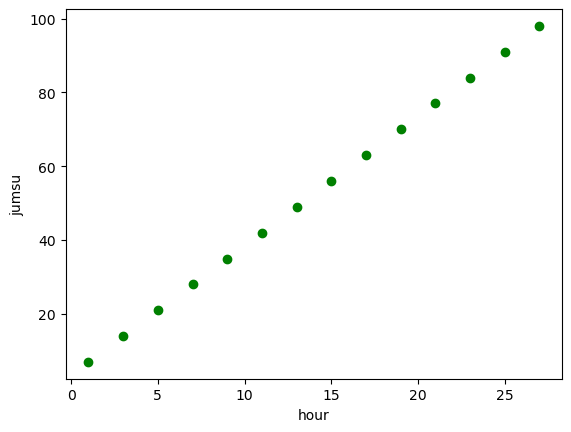

In [49]:
### 현재 데이터의 분포 확인
plt.plot(hourDF,jumsuSR,'go')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.show()

[2] 모델 생성 및 학습 진행


In [50]:
# 모듈로딩
from sklearn.linear_model import LinearRegression

In [51]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [52]:
# 학습 진행 ==> 최대한 많은 데이터를 만족하는 기울기와 절편 찾음
model.fit(hourDF,jumsuSR)

LinearRegression()

In [53]:
# 학습 후 모델 파라미터
print(f' 기울기 : {model.coef_}, 절편 : {model.intercept_}')

 기울기 : [3.5], 절편 : 3.500000000000014


y = ax + b  
y : jumsu  
x : hour  
a: 기울기  
b : 절편  

In [54]:
# y = ax + b  == predict
pre_jumsu = model.coef_[0]*hourDF+model.intercept_
pre_jumsu = pre_jumsu.values.reshape(-1)

In [55]:
# 실제 점수와 예측 점수 차이 확인 jumsuSR - pre_jumsu
## pre_jumsu는 ndarray기 때문에 jumsuSR을 ndarray로 바꿔주고 계산함
real_jumsu = jumsuSR.to_numpy()

real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

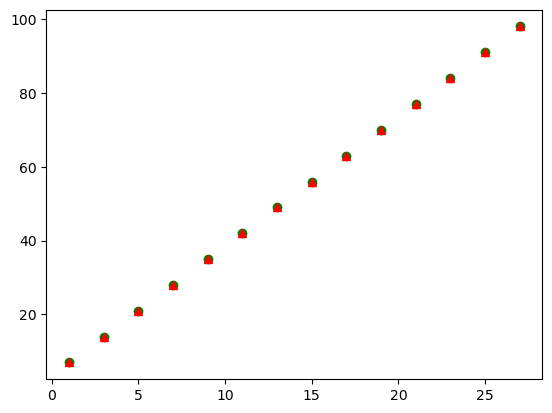

In [56]:
### 현재 데이터의 분포 확인
plt.plot(hourDF,jumsuSR,'go',label = 'Real  jumsu')
plt.plot(hourDF,pre_jumsu,'r^',label='Predict jumsu')
plt.show()

[3] 모델 성능 평가

In [57]:
model.score(hourDF,jumsuSR)

1.0

In [58]:
### 오차 계산 즉, 손실/비용 함수 확인
### root_mean_squared_error ==> sklearn.__version__ 1.4 이상
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# 입력 샘플에 대해서 출력값 예측
pre_y = model.predict(hourDF)

In [61]:
## 손실/비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울수록 좋은 모델
mse = mean_squared_error(jumsuSR,pre_y)
rmse = mean_squared_error(jumsuSR,pre_y,squared=False)
mae = mean_absolute_error(jumsuSR,pre_y)
r2=r2_score(jumsuSR,pre_y)

In [63]:
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2 : 1.0
